In [1]:
import numpy as np
import math
import cmath
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
m_lambda = 0.1 #длина волны
m_x_size = 8 
m_y_size = 8

In [3]:
#Расположение антенн на антенном полотне
antenna_x = []
antenna_y = []
antenna_z = []
x = 0;
for i in range(m_x_size):
    y = i * m_lambda/2 - (m_x_size - 1)/4 * m_lambda;
    for j in range(m_y_size):
        z = j * m_lambda/2 - (m_y_size - 1)/4 * m_lambda;
        
        antenna_x.append(x)
        antenna_y.append(y)
        antenna_z.append(z)

In [4]:
#Расчет вектора сдвига по фазе для антенн
def phase(x,y):
    pv = []
    for i in range(m_x_size):
        for j in range(m_y_size):  

            r = math.sqrt(
                  pow(x - antenna_x[j+m_x_size*i], 2)+
                  pow(y - antenna_y[j+m_x_size*i], 2)+
                  pow(1 - 30 - antenna_y[j+m_x_size*i], 2)
                );

            cur_phase = 2 * math.pi / m_lambda * r
            pv.append(cmath.exp(complex(0, cur_phase)))      
    return pv

In [5]:
# Одна итерация
v1 = phase(0, 1500)#Получение сдвига по фазе в зависимости от расположения пользователя
v2 = phase(0, 1500)#Получение сдвига по фазе в зависимости от расположения пользователя

v1 = v1/LA.norm(v1)
v2 = v2/LA.norm(v2)

x = pow(np.absolute(np.dot(v1, v2)), 2)

In [14]:
#Здесь идет расчет произведения каналов в зависимости от расположения пользователя.
x = range(120)
y = []

distance = 1000
for i in x:
    xx = distance*math.cos(i/2*math.pi/180)
    yy = distance*math.sin(i/2*math.pi/180)
    v1 = phase(xx, yy)
    v2 = phase(-xx, -yy)
    #v1 = v1/LA.norm(v1)
    #v2 = v2/LA.norm(v2)
    y.append(pow(np.absolute(np.vdot(v1, v2)), 2))

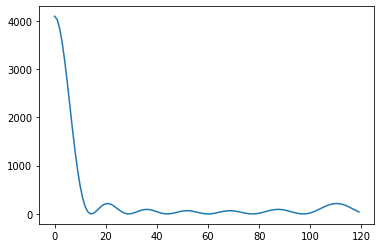

In [15]:
plt.plot(x,y)